# Heart Disease UCI Dataset


### An extensive study on the heart disease dataset from UCI where we try to answer a few basic questions that could help us understand heart diseases better.

## Business Understanding

Heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease; heart rhythm problems (arrhythmias); and heart defects you're born with (congenital heart defects), among others. The term "heart disease" is often used interchangeably with the term "cardiovascular disease." Cardiovascular disease generally refers to conditions that involve narrowed or blocked blood vessels that can lead to a heart attack, chest pain (angina) or stroke. Other heart conditions, such as those that affect your heart's muscle, valves or rhythm, also are considered forms of heart disease.  

Heart disease is the number one killer in the U.S. It is also a major cause of disability. Therefore it is important to answer few basic questions that we might have: 

Q1. Are women more likely to have heart disease than men?  
Q2. At what age range the chance of heart disease is high?  
Q3. How likely is that heart disease shows some symptoms like chest pain?  

## Data Understanding

The first step is to gather the data that would help us answer the questions for which we started our analysis.  
The dataset was already collected by researchers and made available open source.   

Dataset Information:  
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

The list of 14 attributes:   
1. (age) age in years
2. (sex) sex (1 = male; 0 = female)
3. (cp) chest pain type
4. (trestbps) resting blood pressure (in mm Hg on admission to the hospital)
5. (chol) serum cholestoral in mg/dl
6. (fbs) (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. (restecg) resting electrocardiographic results
8. (thalach) maximum heart rate achieved
9. (exang) exercise induced angina (1 = yes; 0 = no)
10. (oldpeak) ST depression induced by exercise relative to rest
11. (slope) the slope of the peak exercise ST segment
12. (ca) number of major vessels (0-3) colored by flourosopy
13. (thal) 3 = normal; 6 = fixed defect; 7 = reversable defect
14. (num) (the predicted attribute) diagnosis of heart disease (angiographic disease status)

The visualizations below help us understand the data better.

## Data Processing

The data had missing values which were represented by "?". We removed the rows that contained missing vaues and converted the  prediction columns value to binary 0 or 1 which would represent presence of heart disease or not. As the data was already prepared by the researchers not much work on the data processing was required. 

In [1]:
# Load Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import string
import random
import scipy.stats as stt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Read Data
data = pd.read_csv('Data/datasets_33180_43520_heart.csv')
print(data.head())
print(data.info())
print(data.describe())
print(data.shape)
print(data.columns)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int

None
None
None


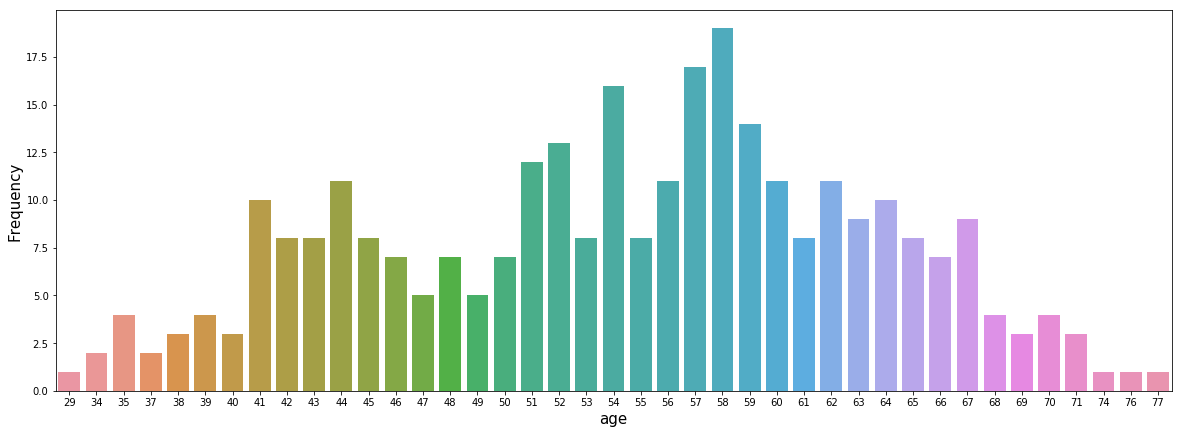

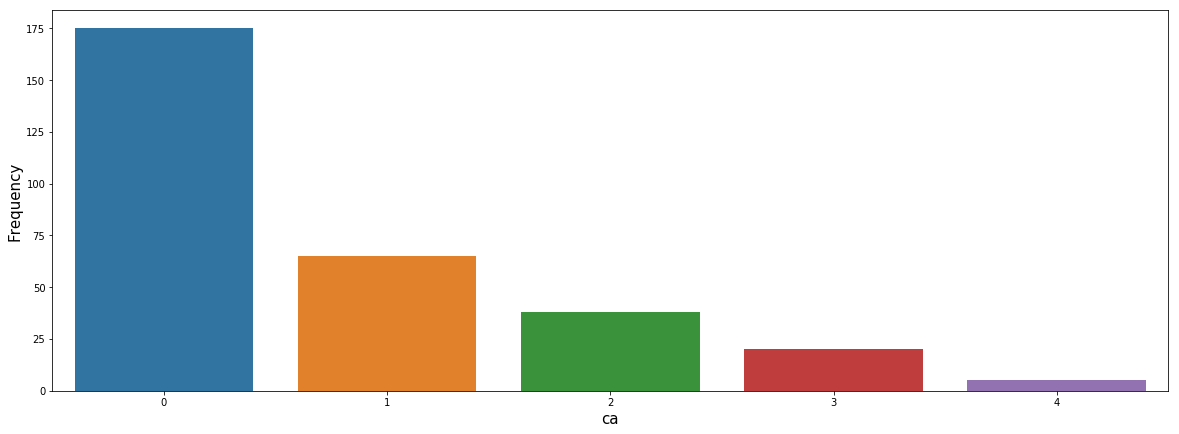

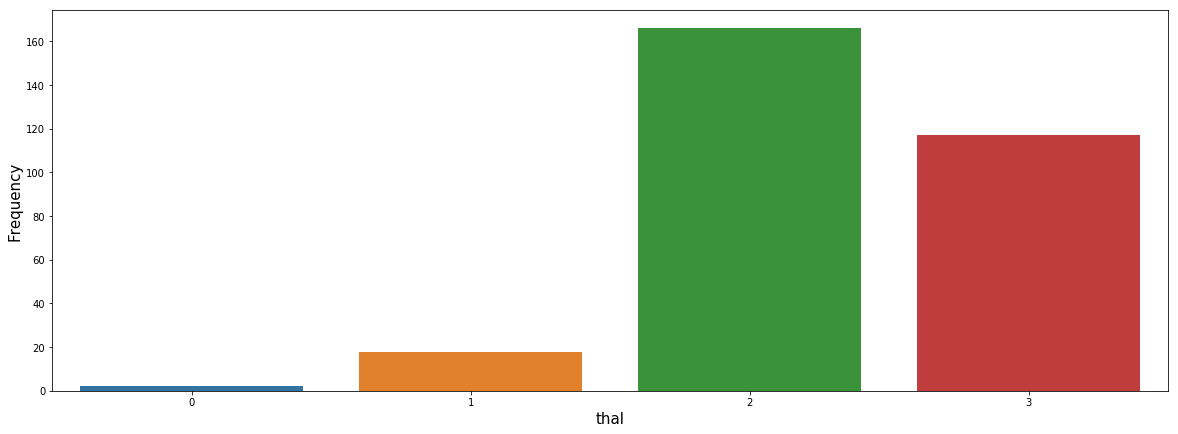

In [3]:
# plot histogram
def plot_histogram(data, hist_col):
    """
    Plot Histogram for any column input using parameter. 
    Input:
        data: Dataframe that contains the column on which the plot needs to be done.
        hist_col: Column for the histogram
    Output: 
        Visual output with graph
    """
    plt.figure(figsize = (20,7))
    sns.countplot(data[hist_col])
    plt.xlabel(hist_col, fontsize = 15)
    plt.ylabel('Frequency', fontsize = 15)

print(plot_histogram(data, 'age'))
print(plot_histogram(data, 'ca'))
print(plot_histogram(data, 'thal'))

## 1. Are women more likely to have heart disease than men?

Men have disease:  0.4492753623188406
Women have disease:  0.75


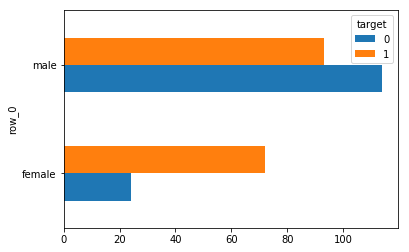

In [4]:
sex_str = np.where(data.sex==1, 'male', 'female')
pd.crosstab(sex_str, data.target).plot(kind='barh');

print("Men have disease: ",data[(data.sex==1)&(data.target==1)].shape[0]/data[(data.sex==1)].shape[0])
print("Women have disease: ",data[(data.sex==0)&(data.target==1)].shape[0]/data[(data.sex==0)].shape[0])

## 2. At what age range the chance of heart disease is high?

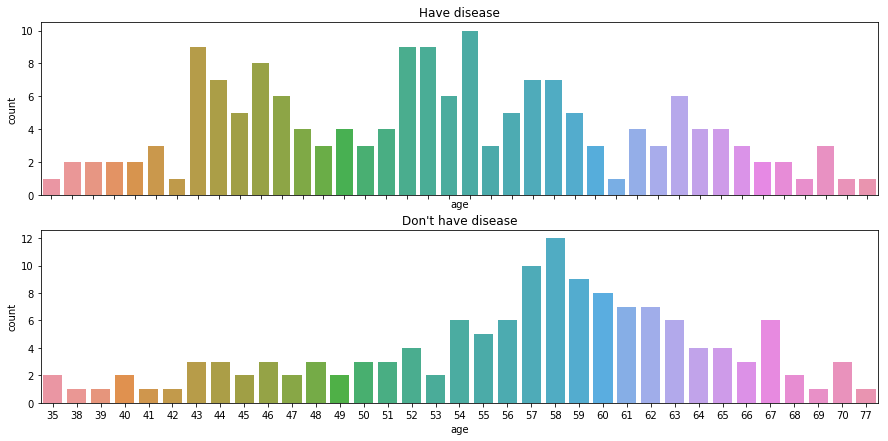

In [5]:
# At what age does the disease start 
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(2,1,1)
ax1.set_title('Have disease')
ax1.tick_params(labelbottom='off',axis='x')
sns.countplot(data[data.target==1].age);
ax2 = fig.add_subplot(2,1,2)
ax2.set_title("Don't have disease")
sns.countplot(data[data.target==0].age);

## 3. How likely is that heart disease shows some symptoms like chest pain?

Human have pain and disease: 76.36%


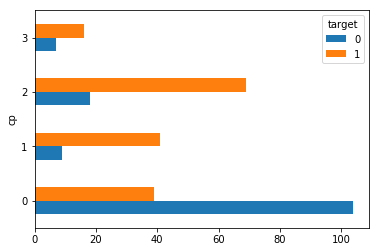

In [6]:
pd.crosstab(data.cp, data.target).plot(kind='barh');
print('Human have pain and disease: {:.4}%'.format(data[(data.target==1) & (data.cp!=0)].shape[0]/data[data.target==1].shape[0]*100))

## Model Building
Building the random forest model using the sci-kit learn package available in python. The model would help in predicting the presence of heart disease if parameters are input into the model. 

In [7]:
data_train, data_test, targ_train, targ_test = train_test_split(\
            data[['age','sex','cp','thalach','exang','oldpeak','slope','ca','thal']], data.target, test_size=0.2)

In [8]:
forest = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=4)
forest.fit(data_train, targ_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
labels = forest.predict(data_test)
sns.set(font_scale=1.5)
auc = roc_auc_score(labels, targ_test)
fpr, tpr, thresholds = roc_curve(labels,targ_test)
print('ROC curve: AUC={0:0.2f}'.format(auc));

ROC curve: AUC=0.82


## Evaluation
The model that we have built gives an accuracy of 83% when cross validated across the dataset. The accuracy is above par and the model can be tested on further data to validate the model. The important parameters in our analysis would be the _age_, _sex_, _cp_, _thalach_, _exang_, _oldpeak_, _slope_, _ca_, _thal_

In [10]:
scores = cross_val_score(forest, data[['age','sex','cp','thalach','exang','oldpeak','slope','ca','thal']], data.target, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.82 (+/- 0.09)


In [11]:
print(classification_report(labels,targ_test))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78        23
           1       0.89      0.82      0.85        38

   micro avg       0.82      0.82      0.82        61
   macro avg       0.81      0.82      0.81        61
weighted avg       0.83      0.82      0.82        61



## Feature Importance

In [12]:
forest.feature_importances_

array([0.07398699, 0.03010315, 0.17069789, 0.12178371, 0.08002308,
       0.16288999, 0.09519663, 0.10278971, 0.16252885])

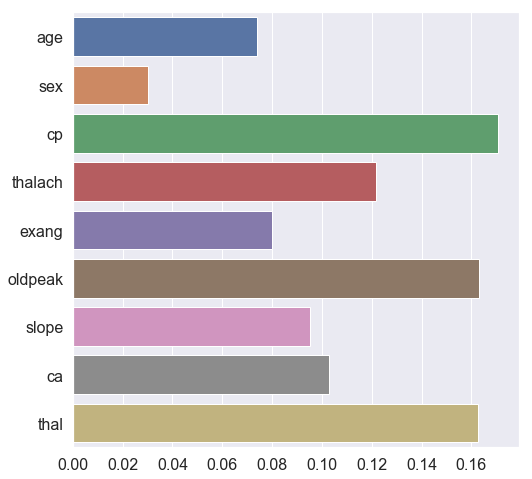

In [13]:
feat_imp = pd.DataFrame(forest.feature_importances_, index = ['age','sex','cp','thalach','exang','oldpeak','slope','ca','thal'])
plt.figure(figsize=(8,8));
sns.barplot(feat_imp[0],feat_imp.index);
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel('');

## Deployment

The deployment can be set up using the Flask API or Shiny dashboard in R.